### Nama      : Rizaldy Ali Machfuddin
### NIM       : 2141720115
### Kelas     : TI - 3F

---
# **Tugas Praktikum OCR - Pertemuan 12**
---
##### Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

##### 1. Persiapan Gambar:
- Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
- Tampilkan gambar asli menggunakan Python dan OpenCV.

##### 2. Deteksi Orientasi dan Skrip:
- Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
- Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
- Tampilkan hasil orientasi dan jenis skrip.

---
# **1. Persiapan Gambar**
---

In [1]:
# Mengimpor library dari Google Colab untuk mengakses Google Drive
from google.colab import drive

# Mount (hubungkan) Google Drive ke folder '/content/drive' di lingkungan Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalasi Tesseract OCR
!sudo apt install tesseract-ocr

# Instalasi pustaka pytesseract
!pip install pytesseract

# Instalasi pustaka OpenCV (opencv-python)
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (9,142 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [3]:
# Import modul re (regular expression) untuk pemrosesan teks
import re

# Import OpenCV (cv2) untuk operasi pengolahan gambar
import cv2

# Import NumPy (np) untuk manipulasi array dan data numerik
import numpy as np

# Import modul pytesseract untuk menggunakan Tesseract OCR
import pytesseract

# Import modul Output dari pytesseract untuk pengaturan output Tesseract OCR
from pytesseract import Output

# Import modul pyplot dari matplotlib untuk menampilkan gambar
from matplotlib import pyplot as plt

In [6]:
# Directory
IMG_DIR = '/content/drive/MyDrive/Colab Notebooks/ML/images/'

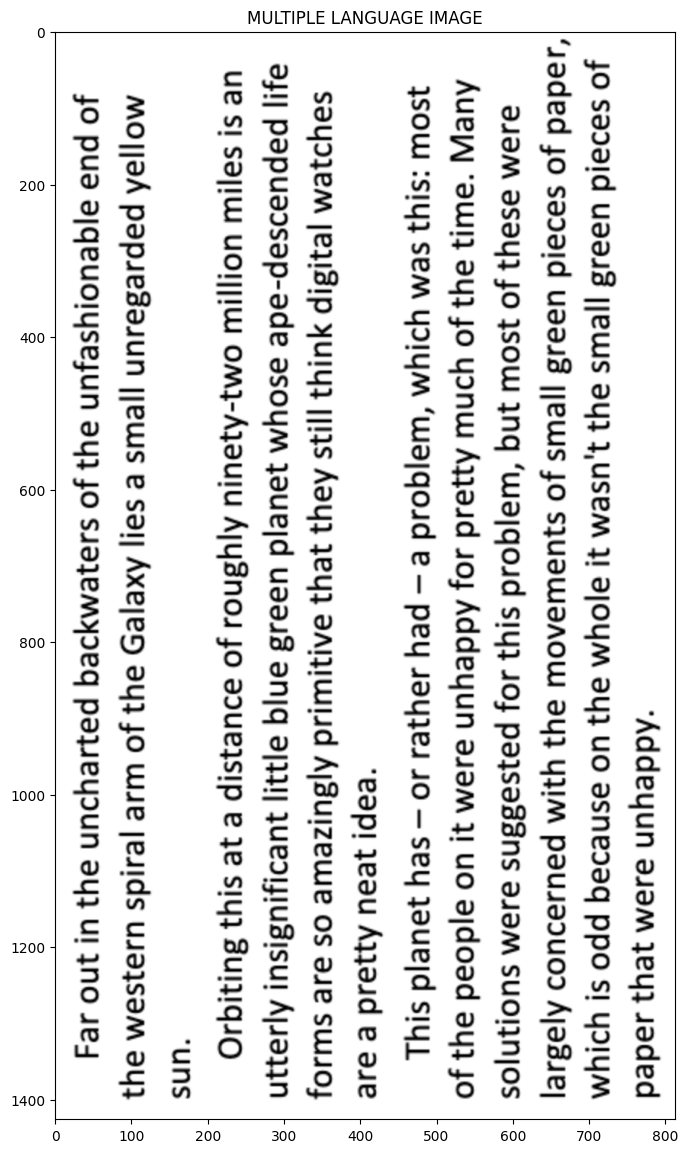

In [7]:
# Membaca gambar asli dari direktori yang telah didefinisikan sebelumnya (IMG_DIR)
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memisahkan channel warna (biru, hijau, merah) untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

---
# **2. Deteksi Orientasi dan Skrip**
---

In [8]:
# Menggunakan modul imutils untuk mempermudah operasi terkait gambar
import imutils

# Menggunakan pytesseract.image_to_osd() untuk mendapatkan informasi orientasi
results = pytesseract.image_to_osd(rgb_img, output_type=Output.DICT)

# Menampilkan informasi orientasi
print("[INFO] detected orientation: {}".format(
    results["orientation"]))

# Menampilkan informasi rotasi yang diperlukan untuk koreksi
print("[INFO] rotate by {} degrees to correct".format(
    results["rotate"]))

# Menampilkan informasi jenis skrip yang terdeteksi
print("[INFO] detected script: {}".format(results["script"]))

[INFO] detected orientation: 270
[INFO] rotate by 90 degrees to correct
[INFO] detected script: Latin


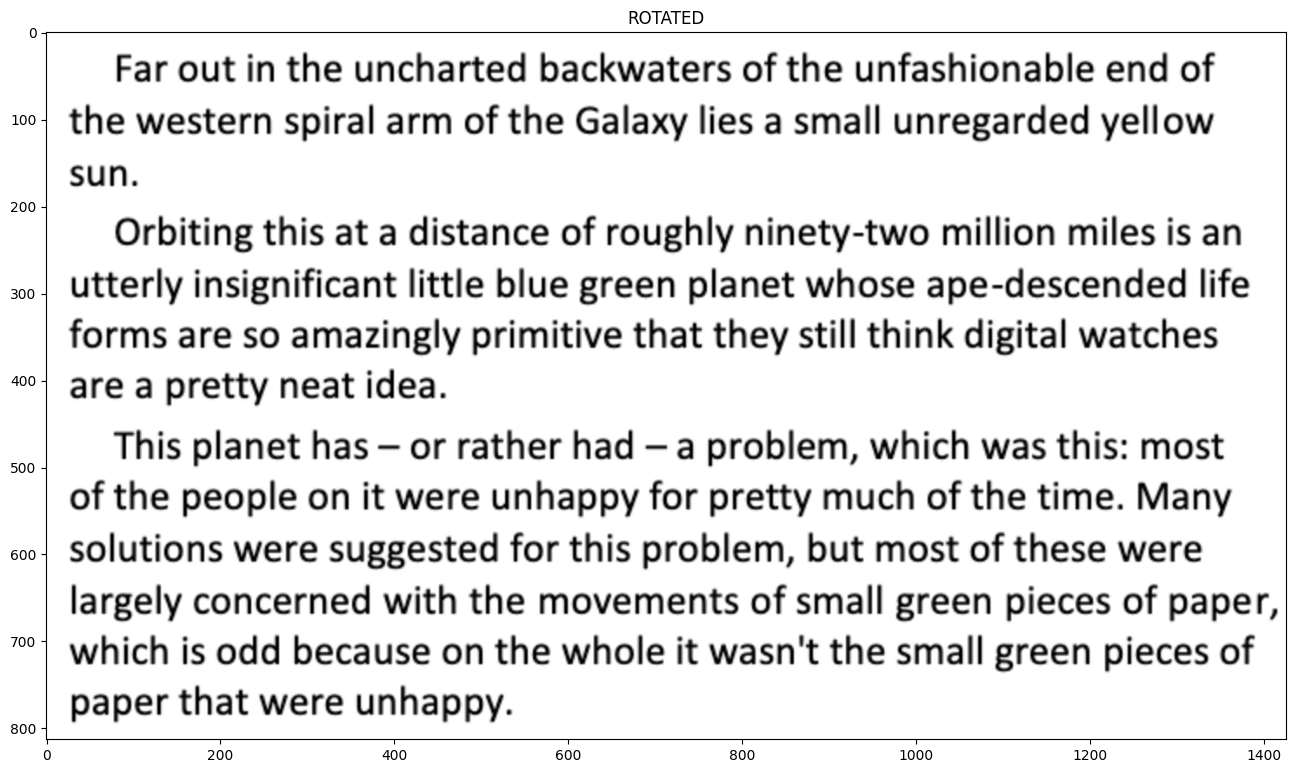

In [9]:
# Memutar gambar secara adaptif berdasarkan sudut rotasi yang diperlukan
rotated = imutils.rotate_bound(image, angle=results["rotate"])

# Menampilkan gambar yang telah diputar
plt.figure(figsize=(16, 12))
plt.imshow(rotated)
plt.title('ROTATED')
plt.show()

In [10]:
# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar yang telah diputar
print(pytesseract.image_to_string(rotated, config=custom_config))

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

